***MILESTONE 1***

**Module 1**\
**Collected a structured dataset containing relevant environmental features and FWI target variable.**

In [65]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import math
import warnings
warnings.filterwarnings("ignore")
print("Imported Successfulley")

Imported Successfulley


 **Loaded the dataset into a Pandas DataFrame for further analysis.**

In [68]:
#read and load dataset
df = pd.read_csv('C:\\Users\\DELL\\OneDrive\\Desktop\\FWI_Predictor\\Datasets\\FWI Dataset.csv')
print("Loaded the dataset using pandas")

Loaded the dataset using pandas


**Ensured the dataset includes Temperature, RH, Wind Speed, Rain, FFMC, DMC, ISI, Region.**\
**Verified data types, consistency, and proper formatting.**

In [69]:
#Info(columns, non-null count, datatypes, memory usage, range index)
print("\nBasic Information About Dataset:")
print(df.info())


Basic Information About Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          244 non-null    int64  
 1   month        244 non-null    int64  
 2   year         244 non-null    int64  
 3   Temperature  244 non-null    int64  
 4    RH          244 non-null    int64  
 5    Ws          244 non-null    int64  
 6   Rain         244 non-null    float64
 7   FFMC         244 non-null    float64
 8   DMC          244 non-null    float64
 9   DC           244 non-null    object 
 10  ISI          244 non-null    float64
 11  BUI          244 non-null    float64
 12  FWI          244 non-null    object 
 13  Classes      243 non-null    object 
 14  Region       244 non-null    object 
dtypes: float64(5), int64(6), object(4)
memory usage: 28.7+ KB
None


In [70]:
#datatypes of features
print("Data Types of Each Column:")
print(df.dtypes)

Data Types of Each Column:
day              int64
month            int64
year             int64
Temperature      int64
 RH              int64
 Ws              int64
Rain           float64
FFMC           float64
DMC            float64
DC              object
ISI            float64
BUI            float64
FWI             object
Classes         object
Region          object
dtype: object


In [71]:
#Dataset 
print("\nFirst 5 Rows of Dataset:")
print(df.head())
print("\nLast 5 Rows of Dataset:")
print(df.tail())


First 5 Rows of Dataset:
   day  month  year  Temperature   RH   Ws  Rain   FFMC  DMC    DC  ISI  BUI  \
0    1      6  2012           29   57   18    0.0  65.7  3.4   7.6  1.3  3.4   
1    2      6  2012           29   61   13    1.3  64.4  4.1   7.6  1.0  3.9   
2    3      6  2012           26   82   22   13.1  47.1  2.5   7.1  0.3  2.7   
3    4      6  2012           25   89   13    2.5  28.6  1.3   6.9  0.0  1.7   
4    5      6  2012           27   77   16    0.0  64.8  3.0  14.2  1.2  3.9   

   FWI    Classes    Region  
0  0.5  not fire     Bejaia  
1  0.4  not fire     Bejaia  
2  0.1  not fire     Bejaia  
3    0  not fire     Bejaia  
4  0.5  not fire     Bejaia  

Last 5 Rows of Dataset:
     day  month  year  Temperature   RH   Ws  Rain   FFMC   DMC    DC  ISI  \
239   26      9  2012           30   65   14    0.0  85.4  16.0  44.5  4.5   
240   27      9  2012           28   87   15    4.4  41.1   6.5     8  0.1   
241   28      9  2012           27   87   29    0.5  4

In [72]:
#stats for numerical features
print("\nStatistical Summary of Numerical Features:")
print(df.describe())


Statistical Summary of Numerical Features:
              day       month    year  Temperature          RH          Ws  \
count  244.000000  244.000000   244.0   244.000000  244.000000  244.000000   
mean    15.754098    7.500000  2012.0    32.172131   61.938525   15.504098   
std      8.825059    1.112961     0.0     3.633843   14.884200    2.810178   
min      1.000000    6.000000  2012.0    22.000000   21.000000    6.000000   
25%      8.000000    7.000000  2012.0    30.000000   52.000000   14.000000   
50%     16.000000    7.500000  2012.0    32.000000   63.000000   15.000000   
75%     23.000000    8.000000  2012.0    35.000000   73.250000   17.000000   
max     31.000000    9.000000  2012.0    42.000000   90.000000   29.000000   

            Rain         FFMC         DMC         ISI         BUI  
count  244.000000  244.000000  244.000000  244.000000  244.000000  
mean     0.760656   77.887705   14.673361    4.774180   16.664754  
std      1.999406   14.337571   12.368039    4.17

In [73]:
#Number of rows and columns
print("\nShape of Dataset:")
print(df.shape)


Shape of Dataset:
(244, 15)


**Conducted initial inspection to understand feature distributions and data quality.**

In [74]:
#duplicate values in dataset
print("\nChecking for Duplicate Rows:")
print(df.duplicated().sum())


Checking for Duplicate Rows:
0


**Module 2**\
**Checked for missing or null values and handled them appropriately.**

In [75]:
#Missing Values
print("\nChecking for Missing Values:")
print(df.isnull().sum())

#rows with missing values
rows_with_missing = df[df.isnull().any(axis=1)]
print("Rows with missing values: \n",rows_with_missing)

#no of missing values
print("\nTotal number of rows with missing values:")
print(len(rows_with_missing))


Checking for Missing Values:
day            0
month          0
year           0
Temperature    0
 RH            0
 Ws            0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        1
Region         0
dtype: int64
Rows with missing values: 
      day  month  year  Temperature   RH   Ws  Rain   FFMC   DMC      DC   ISI  \
165   14      7  2012           37   37   18    0.2  88.9  12.9  14.6 9  12.5   

      BUI      FWI Classes            Region  
165  10.4  fire          NaN  Sidi-Bel Abbes  

Total number of rows with missing values:
1


**Performed outlier detection using boxplots and statistical thresholds.**

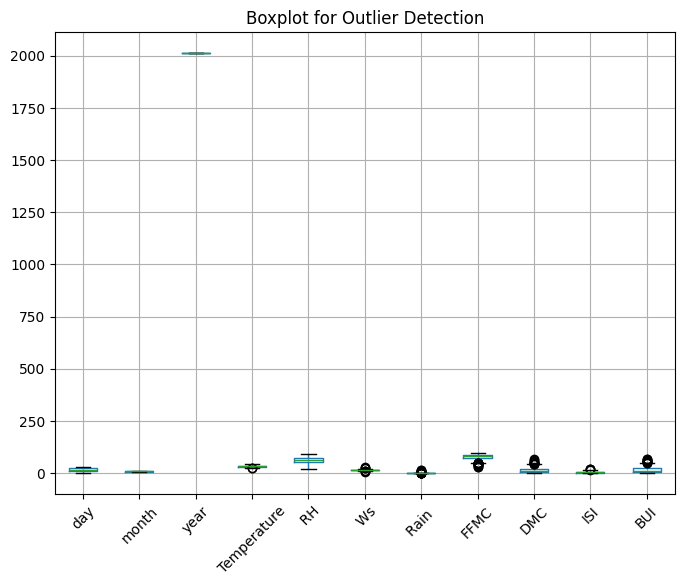


Outliers in day:
Series([], Name: day, dtype: int64)

Outliers in month:
Series([], Name: month, dtype: int64)

Outliers in year:
Series([], Name: year, dtype: int64)

Outliers in Temperature:
93     22
105    22
Name: Temperature, dtype: int64

Outliers in  RH:
Series([], Name:  RH, dtype: int64)

Outliers in  Ws:
2      22
52     22
105    26
176     9
199     9
232     8
237     6
241    29
Name:  Ws, dtype: int64

Outliers in Rain :
1       1.3
2      13.1
3       2.5
14      3.1
38      1.4
91     16.8
92      7.2
93     10.1
94      3.8
101     1.8
102     1.8
104     4.6
105     8.3
116     5.8
120     1.8
121     1.4
123     4.0
124     2.0
129     1.3
134     2.0
138     4.7
139     8.7
140     4.5
151     1.7
152     2.2
159     6.0
160     1.9
161     3.8
162     2.9
188     3.1
189     2.9
218     4.1
219     6.5
237     2.0
240     4.4
Name: Rain , dtype: float64

Outliers in FFMC:
2      47.1
3      28.6
15     36.1
16     37.3
92     46.0
93     30.5
94     42.6
104    

In [76]:
#Boxplots for Outlier Detection
plt.figure(figsize=(8, 6))
df.boxplot()
plt.title("Boxplot for Outlier Detection")
plt.xticks(rotation=45)
plt.show()

#Statistical Threshold IQR Method
def detect_outliers_iqr(dataframe):
    outlier_indices = {}

    for column in dataframe.select_dtypes(include=['float64', 'int64']).columns:
        Q1 = dataframe[column].quantile(0.25)
        Q3 = dataframe[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = dataframe[(dataframe[column] < lower_bound) | (dataframe[column] > upper_bound)][column]
        outlier_indices[column] = outliers
        print(f"\nOutliers in {column}:")
        print(outliers)
    return outlier_indices

outlier_results = detect_outliers_iqr(df)

**Visualized data distributions using histograms and density plots.**

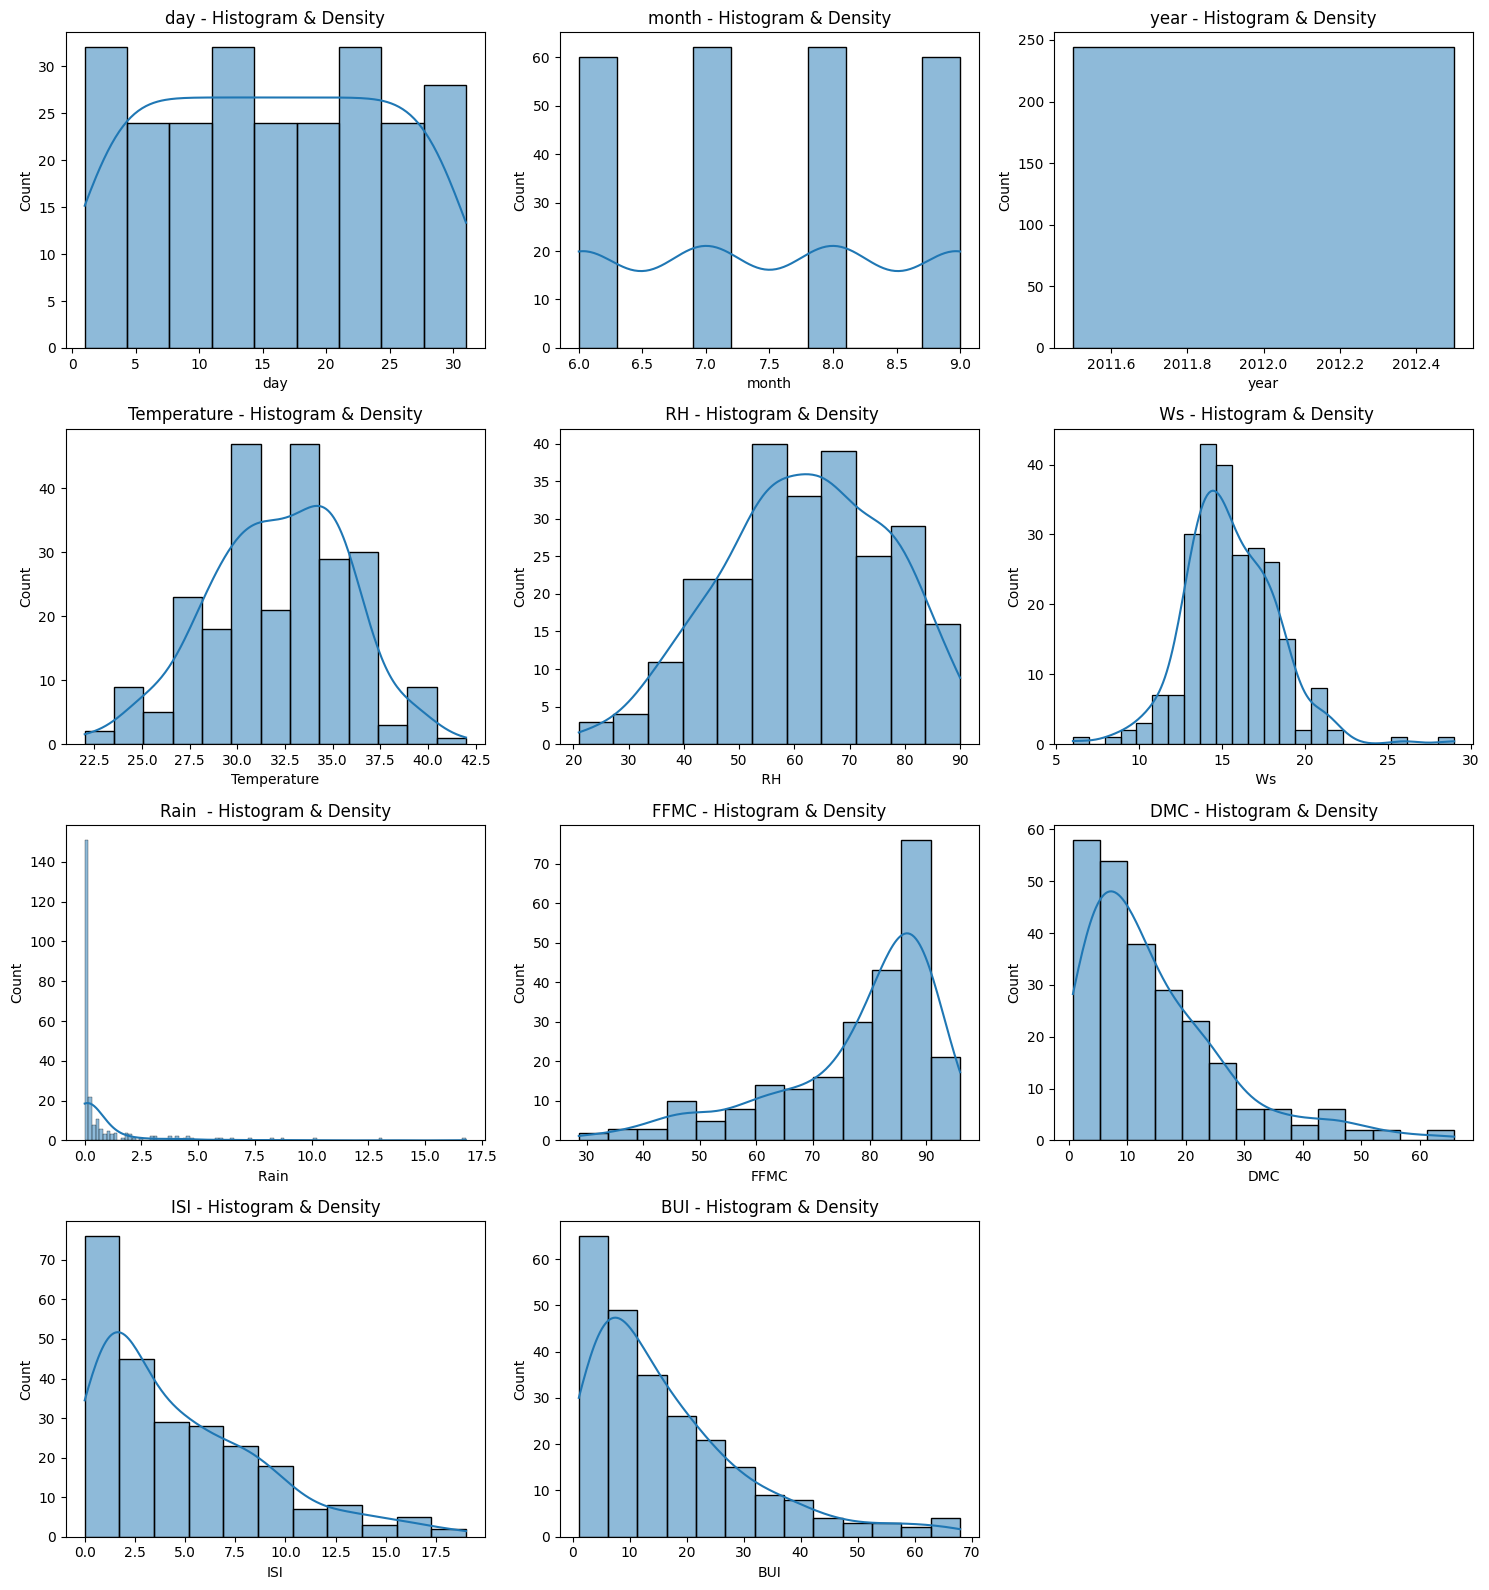

In [77]:
#Denisty+histograms for each feature
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

num_cols = len(numeric_cols)
rows = math.ceil(num_cols / 3)  

plt.figure(figsize=(15, rows * 4))

for i, col in enumerate(numeric_cols, 1):
    plt.subplot(rows, 3, i)
    sns.histplot(df[col], kde=True)
    plt.title(f"{col} - Histogram & Density")

plt.tight_layout()
plt.show()

**Explored feature relationships using correlation matrix and scatterplots.**

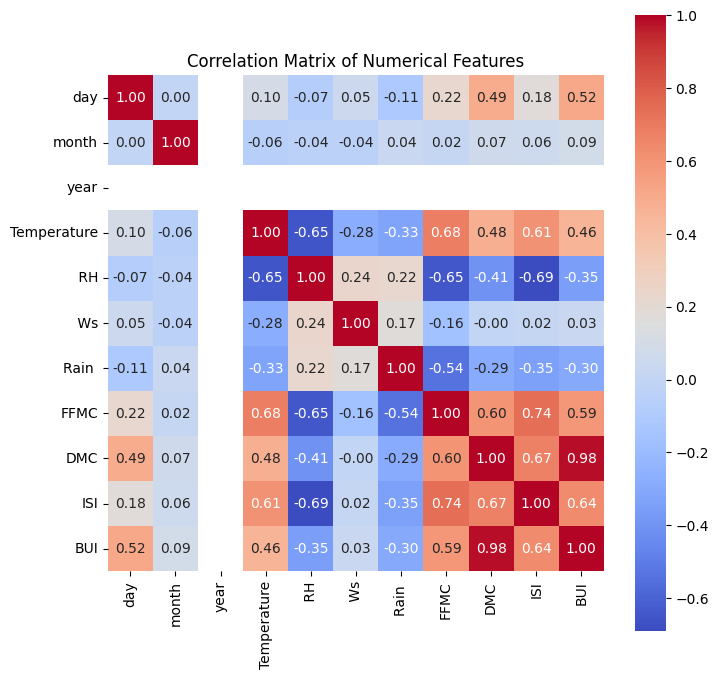

In [78]:
# correlation matrix of numerical features
corr_matrix = df.corr(numeric_only=True)

plt.figure(figsize=(8, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", square=True, fmt=".2f")
plt.title("Correlation Matrix of Numerical Features")
plt.show()

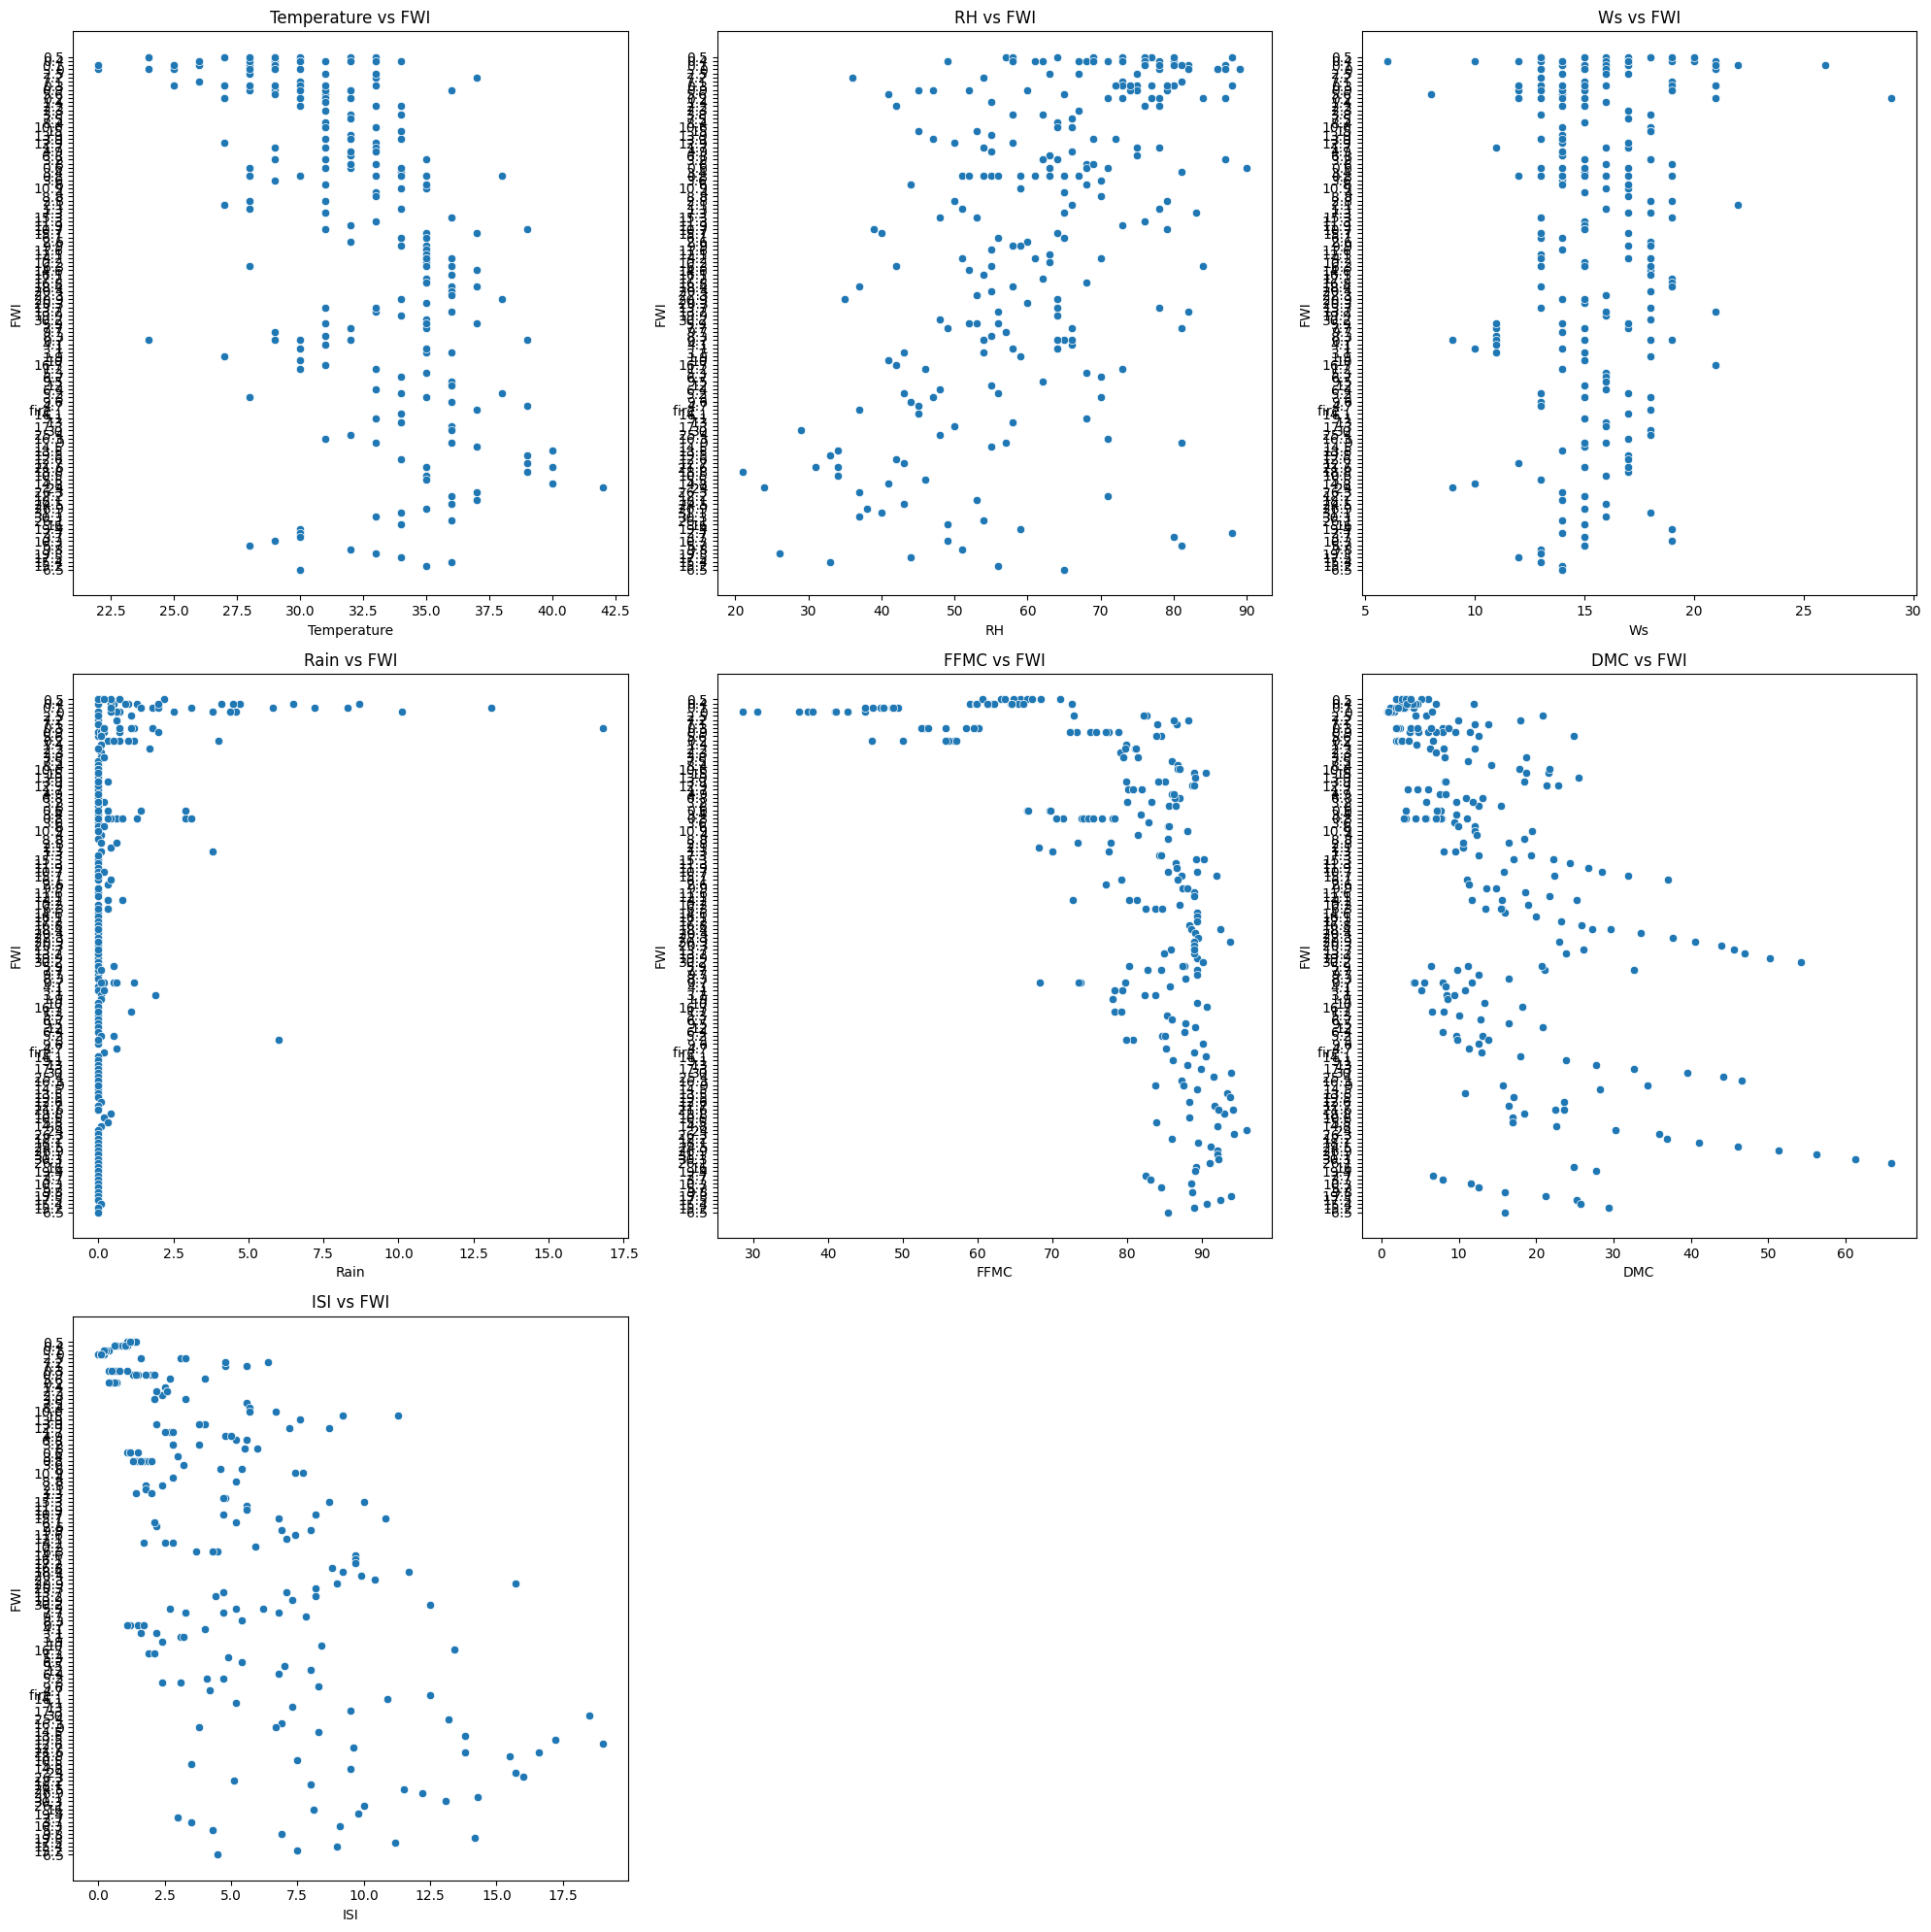

In [79]:
# Scatter Plots for Selected Features vs FWI
df.columns = df.columns.str.strip()

features_to_plot = ['Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'ISI']

plt.figure(figsize=(20, 20))

for i, col in enumerate(features_to_plot, 1):
    plt.subplot(3, 3, i)
    sns.scatterplot(x=df[col], y=df['FWI'])
    plt.title(f"{col} vs FWI")
    plt.xlabel(col)
    plt.ylabel("FWI")

plt.tight_layout()
plt.show()

**Encoded categorical values like Region using label encoding or mapping.**

In [80]:
# Encoding Categorical Feature: Region
df.columns = df.columns.str.strip()
le_region = LabelEncoder()
df['Region_encoded'] = le_region.fit_transform(df['Region'])
print("Encoded Values:\n")
print(df[['Region', 'Region_encoded']].head())
print("\nRegion Mapping:")
region_mapping = dict(zip(le_region.classes_, le_region.transform(le_region.classes_)))
print(region_mapping)
df['Region_encoded'] = df['Region_encoded'].astype('category')
print(df[['Region', 'Region_encoded']].dtypes)

Encoded Values:

   Region  Region_encoded
0  Bejaia               0
1  Bejaia               0
2  Bejaia               0
3  Bejaia               0
4  Bejaia               0

Region Mapping:
{'Bejaia': np.int64(0), 'Sidi-Bel Abbes': np.int64(1)}
Region              object
Region_encoded    category
dtype: object


In [81]:
df = df.drop(columns=['Classes'])

print("Updated columns after dropping 'Classes':")
print(df.columns)

Updated columns after dropping 'Classes':
Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Region', 'Region_encoded'],
      dtype='object')


**Saved the cleaned dataset for use in modeling.**

In [82]:
save_path = r"C:\Users\DELL\OneDrive\Desktop\FWI_Predictor\Datasets\cleaned_dataset.csv"

df.to_csv(save_path, index=False)

print("Cleaned dataset saved successfully at:")
print(save_path)

Cleaned dataset saved successfully at:
C:\Users\DELL\OneDrive\Desktop\FWI_Predictor\Datasets\cleaned_dataset.csv


In [84]:
print(df.isnull().sum())
print(df.dtypes)

day               0
month             0
year              0
Temperature       0
RH                0
Ws                0
Rain              0
FFMC              0
DMC               0
DC                0
ISI               0
BUI               0
FWI               0
Region            0
Region_encoded    0
dtype: int64
day                  int64
month                int64
year                 int64
Temperature          int64
RH                   int64
Ws                   int64
Rain               float64
FFMC               float64
DMC                float64
DC                  object
ISI                float64
BUI                float64
FWI                 object
Region              object
Region_encoded    category
dtype: object
